In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_score, StratifiedKFold

import plotly
import plotly.graph_objs as go
import plotly.offline as ply


In [33]:
df=pd.read_csv('https://github.com/Balantekin/python/raw/main/archive%20(12).zip')

In [34]:
df1 = df[{'adjrev','adjmou','adjqty','Customer_ID'}]

In [35]:
df2 = df[{'adjrev','adjmou','adjqty','churn'}]

In [36]:
df1

,adjmou,adjrev,Customer_ID,adjqty
0,4085.00,1453.44,1000001,1602
1,26367.00,2833.88,1000002,14624
2,24303.05,1934.47,1000003,7888
3,3035.00,1941.81,1000004,1479
4,13965.00,2166.48,1000005,4452
...,...,...,...,...
99995,9494.00,1561.14,1099996,3751
99996,8805.00,1451.85,1099997,3629
99997,9234.00,1055.93,1099998,1238
99998,20488.00,2593.26,1099999,9921


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

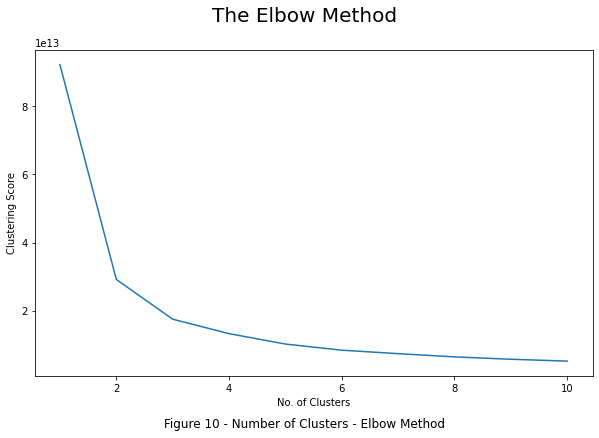

In [38]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(df1)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.suptitle('The Elbow Method',fontsize=20)
txt="Figure 10 - Number of Clusters - Elbow Method"
plt.figtext(0.5, 0.005, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [39]:
kmeans= KMeans(n_clusters = 3, random_state = 42)

# Compute k-means clustering
kmeans.fit(df1)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(df1)

pred

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [40]:
pr=pd.DataFrame(pred)

In [41]:
pr

,0
0,2
1,2
2,2
3,2
4,2
...,...
99995,1
99996,1
99997,1
99998,1


In [44]:
df1['Cluster'] = pd.DataFrame(pr)
df1['Churn'] = pd.DataFrame(df2['churn'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df1

,adjmou,adjrev,Customer_ID,adjqty,Cluster,Churn
0,4085.00,1453.44,1000001,1602,2,1
1,26367.00,2833.88,1000002,14624,2,0
2,24303.05,1934.47,1000003,7888,2,1
3,3035.00,1941.81,1000004,1479,2,0
4,13965.00,2166.48,1000005,4452,2,0
...,...,...,...,...,...,...
99995,9494.00,1561.14,1099996,3751,1,1
99996,8805.00,1451.85,1099997,3629,1,0
99997,9234.00,1055.93,1099998,1238,1,0
99998,20488.00,2593.26,1099999,9921,1,0


In [46]:
km_clusters_amount = pd.DataFrame(df1.groupby(["Cluster"]).Churn.mean())

km_clusters_frequency = pd.DataFrame(df1.groupby(["Cluster"]).adjmou.mean())
km_clusters_recency = pd.DataFrame(df1.groupby(["Cluster"]).adjrev.mean())

In [47]:
df = pd.concat([pd.Series([0,1,2,]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Quantity_mean", "MonthlyUse_mean", "Revenue_mean"]
df.head()

,ClusterID,Quantity_mean,MonthlyUse_mean,Revenue_mean
0,0,0.529951,6836.508437,849.253349
1,1,0.458487,5288.332895,565.564424
2,2,0.498984,10710.937360,1499.144614


In [48]:
a=pd.DataFrame(df1.groupby(["Cluster"]).Churn.sum())

In [49]:
a

,Churn
Cluster,
0,17933
1,15672
2,15957


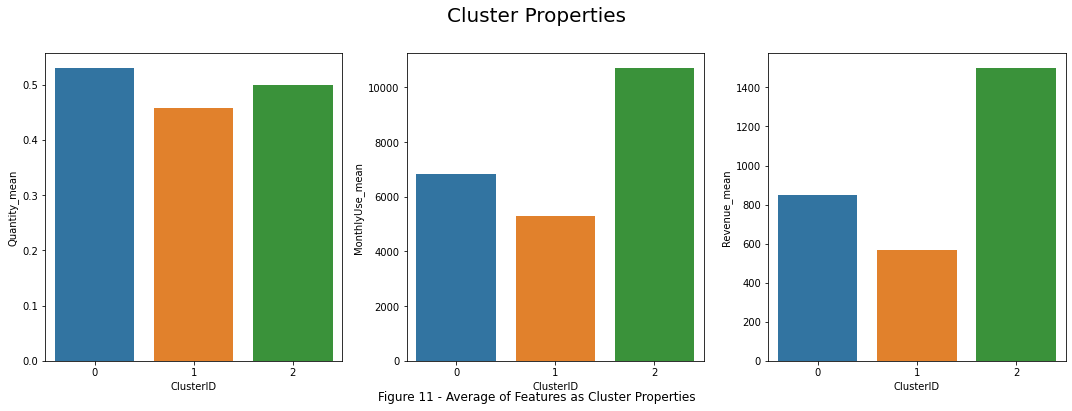

In [50]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df.ClusterID, y=df.Quantity_mean, ax = axs[0])
sns.barplot(x=df.ClusterID, y=df.MonthlyUse_mean, ax = axs[1])
sns.barplot(x=df.ClusterID, y=df.Revenue_mean, ax = axs[2])
plt.tight_layout()  
plt.suptitle('Cluster Properties',fontsize=20,y=1.1)
txt="Figure 11 - Average of Features as Cluster Properties"
plt.figtext(0.5, 0.005, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



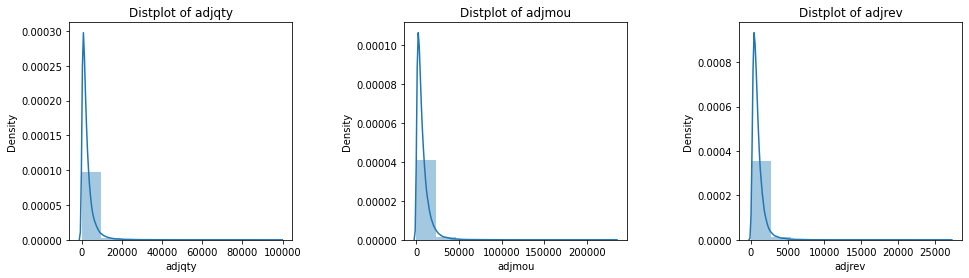

In [ ]:
plt.figure(1, figsize=(16,4))
n = 0 
for x in ['adjqty', 'adjmou', 'adjrev']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df1[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

<Figure size 1152x720 with 0 Axes>

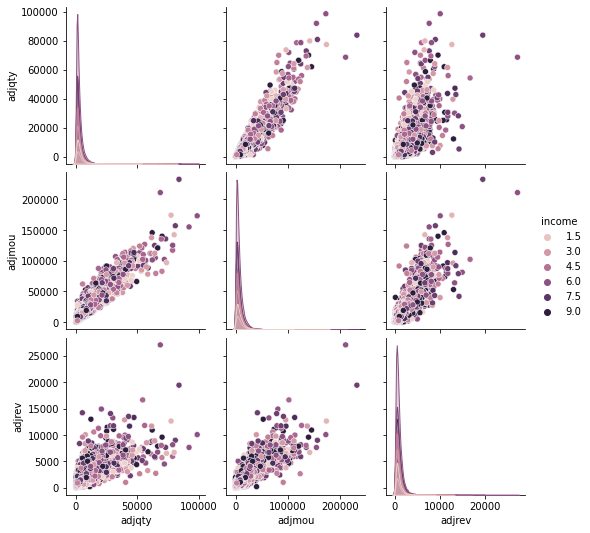

In [ ]:
plt.figure(1, figsize=(16,10) )
sns.pairplot(data=df1, hue='income')
plt.show()

<Figure size 1152x720 with 0 Axes>

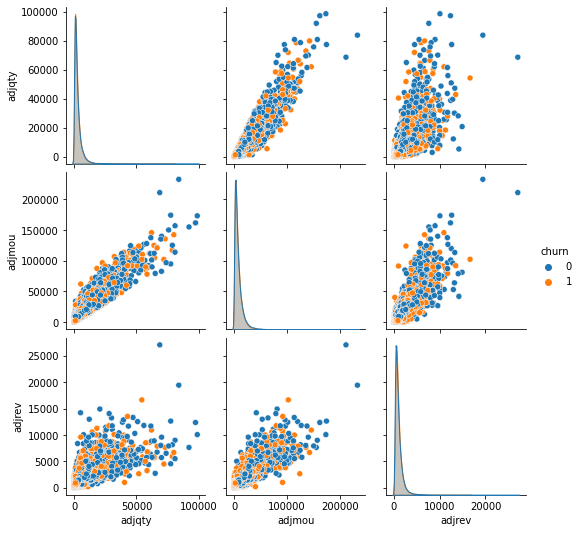

In [ ]:
plt.figure(1, figsize=(16,10) )
sns.pairplot(data=df2, hue='churn')
plt.show()

In [ ]:
pd.plotting.andrews_curves(df2, "churn",color='Blues')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:64: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f186a7044d0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
# Plot
plt.figure(figsize=(12,9), dpi= 80)
pd.plotting.andrews_curves(df2, 'churn', colormap='Set2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

NameError: ignored

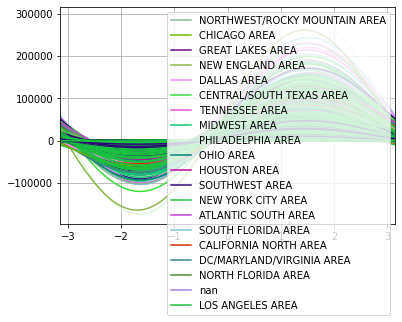

In [ ]:
pd.plotting.andrews_curves(df3, "area")

In [ ]:
!pip install pandas.tools

ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools
